# PREDICTING WHETHER CANCER CELLS ARE MALIGNANT OR BENIGN

## IMPORT LIBRARIES

In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# LOAD DATASET AND SHOW FIRST FIVE OBSERVATIONS

In [57]:
data=pd.read_csv("cell_samples.csv")
data.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## DATA DESCRIPTION AND INFO

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [60]:
data.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

# CONVERTING ? IN DATSET TO 0 

In [61]:
data['BareNuc']=data['BareNuc'].replace({'?':0})
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [62]:
data['BareNuc']=data['BareNuc'].astype('int')

## DETERMINE CORRELATION BETWEEN LABEL 'CLASS' AND OTHER FEATURES

In [63]:
correlation=data.corr()
correlation['Class'].sort_values(ascending=False)

Class          1.000000
UnifShape      0.818934
UnifSize       0.817904
BareNuc        0.816189
BlandChrom     0.756616
Clump          0.716001
NormNucl       0.712244
MargAdh        0.696800
SingEpiSize    0.682785
Mit            0.423170
ID            -0.080226
Name: Class, dtype: float64

<Axes: >

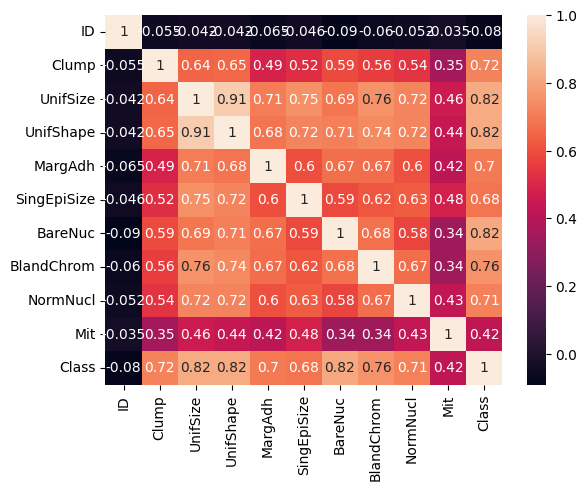

In [64]:
sns.heatmap(correlation,cmap=None,annot=True)

c:\Users\51CAR10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\51CAR10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


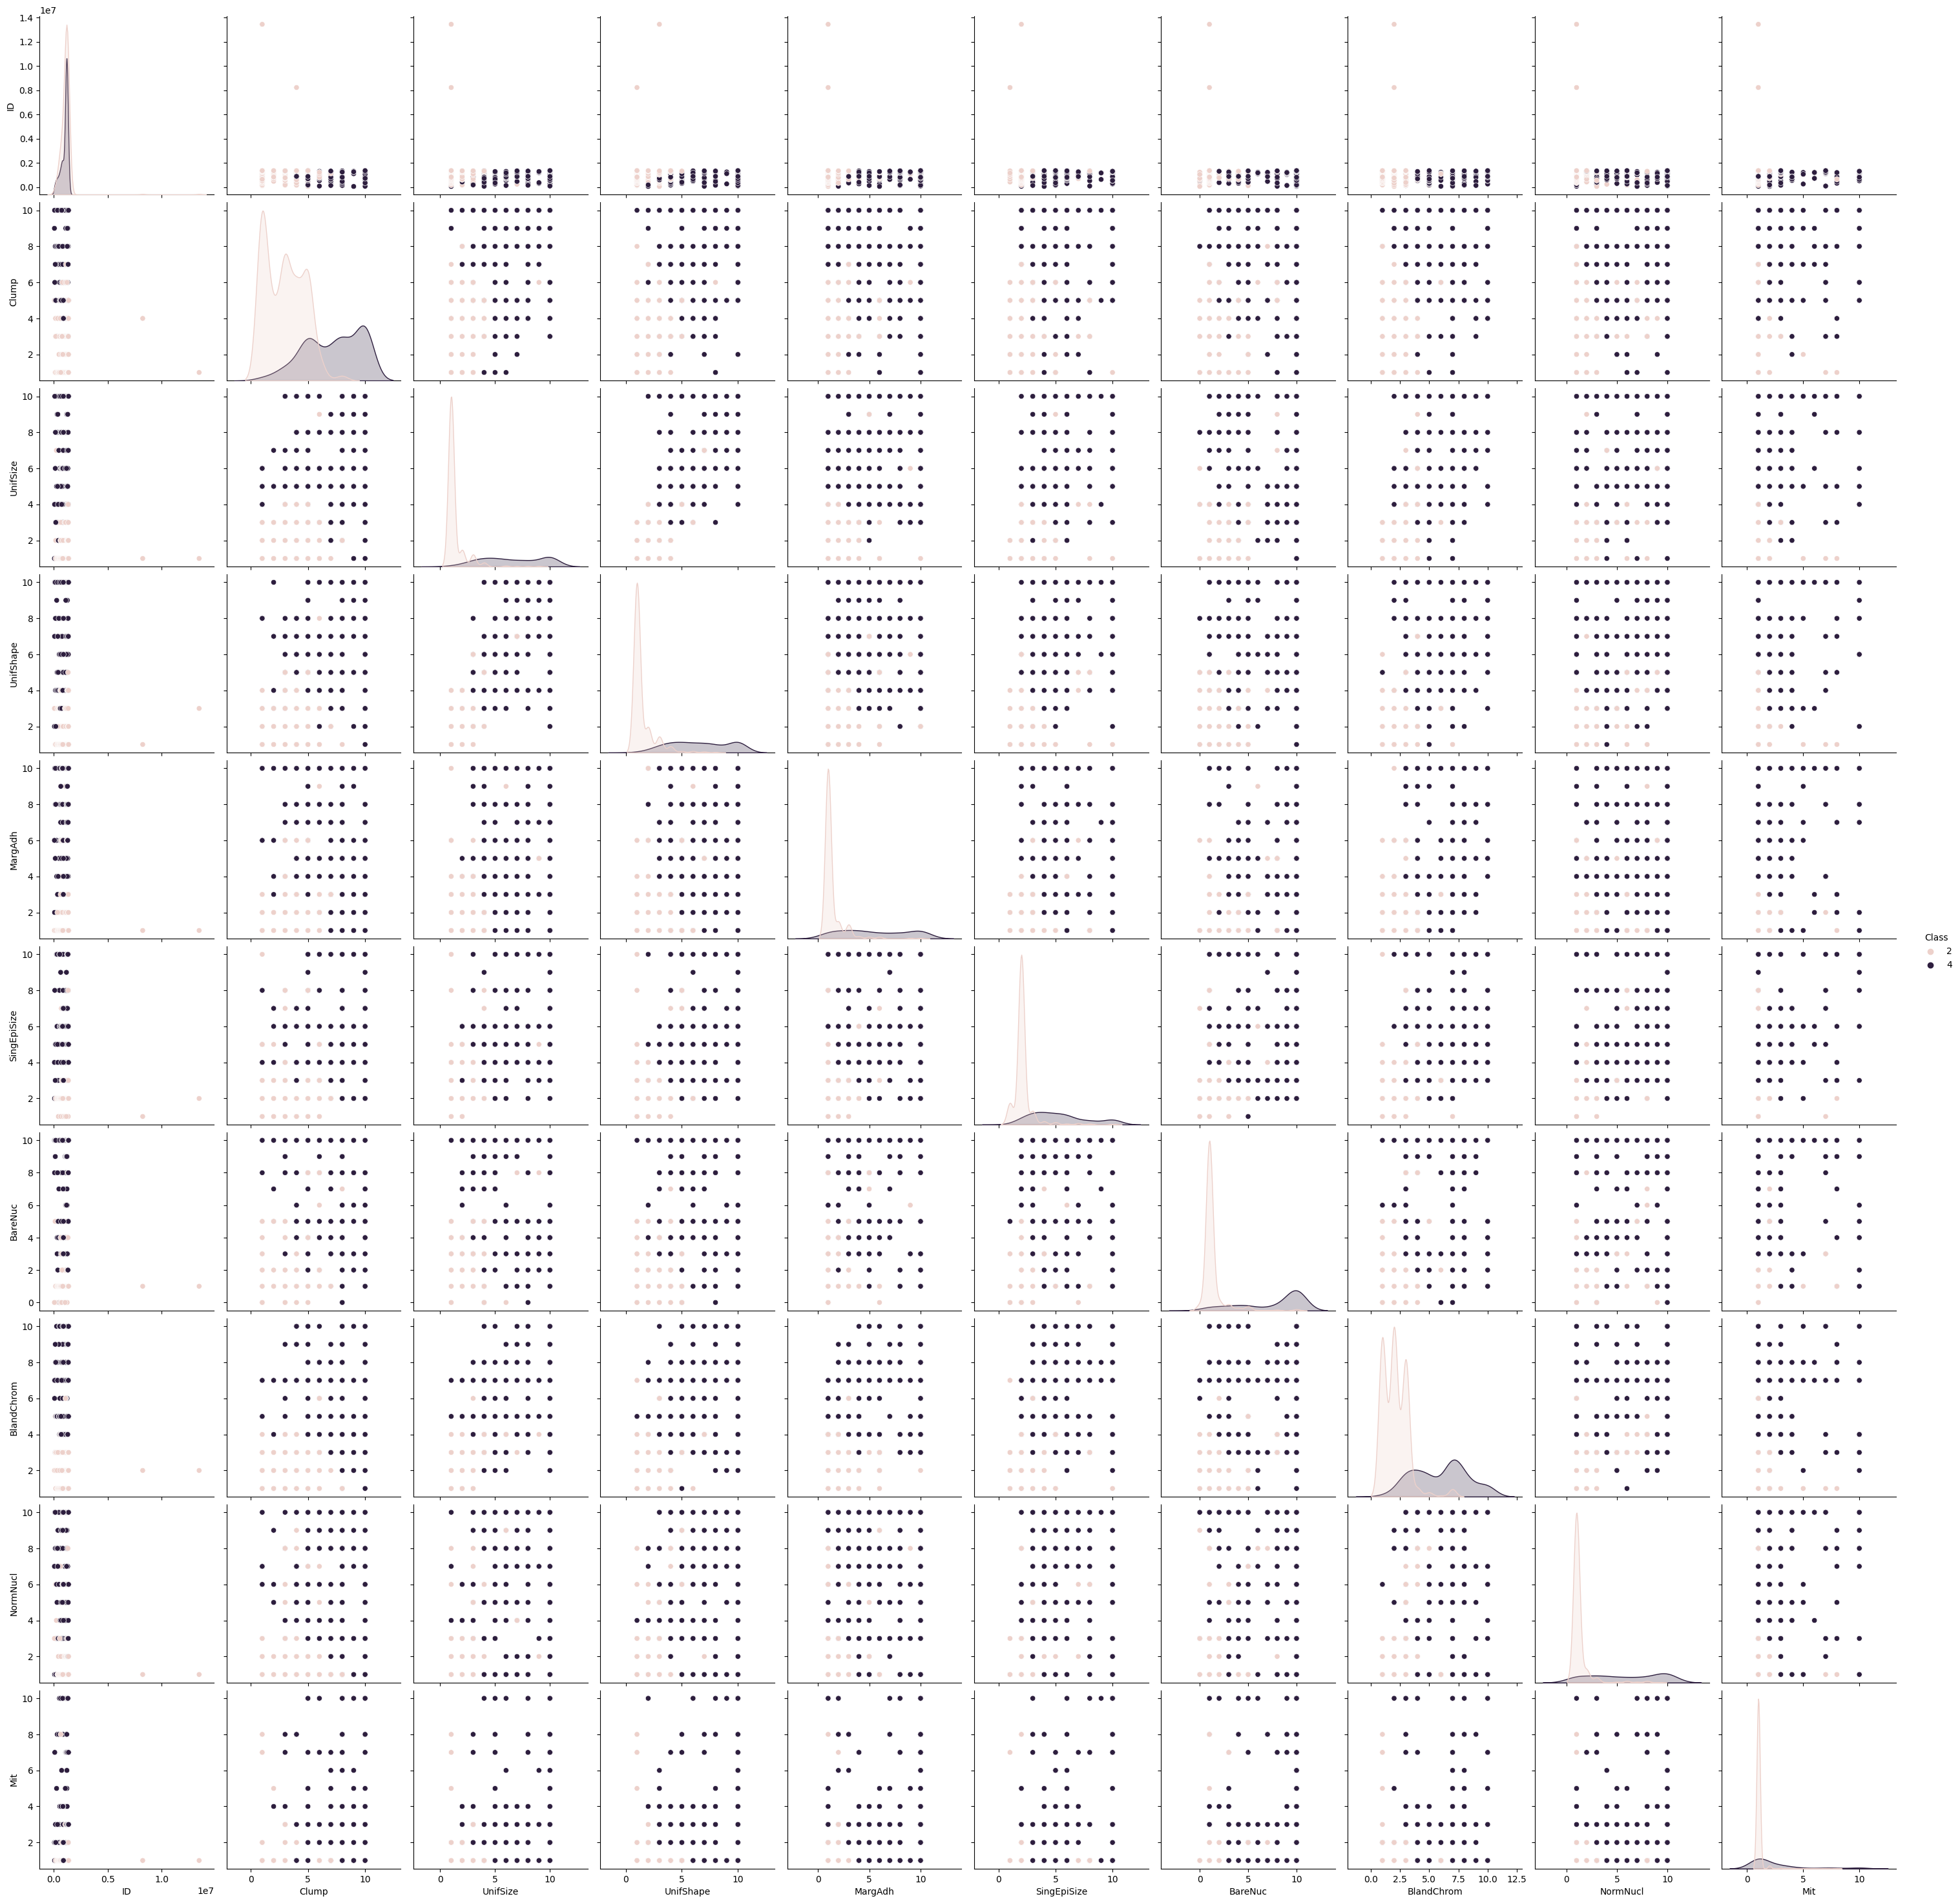

In [65]:
import seaborn as sns
sns.pairplot(data,hue='Class',size=3)

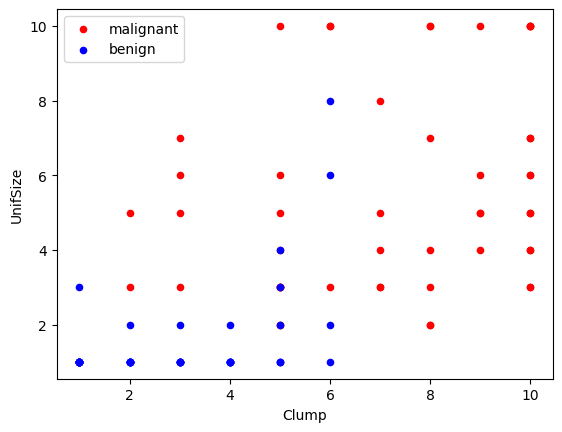

In [66]:
ax = data[data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant')
data[data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign', ax=ax)
plt.show()

## DISTRIBUTION OF CLASS

c:\Users\51CAR10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


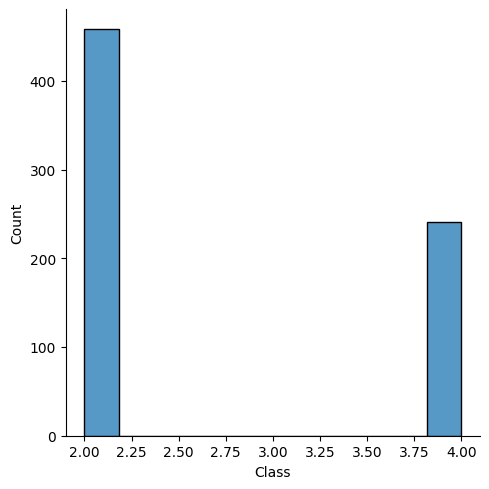

In [67]:
sns.displot(data['Class'])

In [68]:
data.Class.unique()

array([2, 4], dtype=int64)

In [69]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [70]:
data.columns.to_list()

['ID',
 'Clump',
 'UnifSize',
 'UnifShape',
 'MargAdh',
 'SingEpiSize',
 'BareNuc',
 'BlandChrom',
 'NormNucl',
 'Mit',
 'Class']

<Axes: xlabel='Clump', ylabel='Class'>

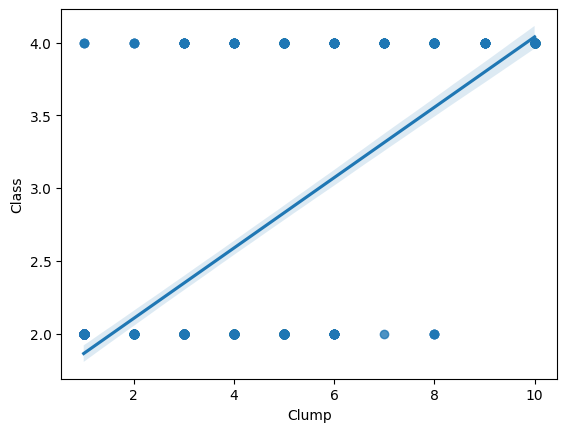

In [71]:
sns.regplot(x='Clump',y='Class',data=data)

## SPLITTING DATA INTO TRAINING AND TEST SPLIT

In [72]:
Features=data.drop(columns=['ID','Class'],axis=1)
Features.columns.to_list()

['Clump',
 'UnifSize',
 'UnifShape',
 'MargAdh',
 'SingEpiSize',
 'BareNuc',
 'BlandChrom',
 'NormNucl',
 'Mit']

In [73]:
X=Features
y=data['Class']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [75]:
X_train.shape

(524, 9)

In [76]:
y_train.shape

(524,)

In [77]:
X_test.shape,y_test.shape

((175, 9), (175,))

# SCALING DATASET

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
S=StandardScaler()
X_train_s=S.fit_transform(X_train)



## LOGISTIC REGRESSION MODEL

In [80]:
from sklearn.linear_model import LogisticRegressionCV

In [81]:
model=LogisticRegressionCV()
model.fit(X_train,y_train)

LogisticRegressionCV()

In [82]:
model_1=LogisticRegressionCV()
model_1.fit(X_train_s,y_train)

LogisticRegressionCV()

In [112]:
X_test_s=S.fit(X_test)


In [84]:
y_pred=model.predict(X_test)

In [113]:
y_pred_1=model.predict(X_test_s)

c:\Users\51CAR10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# DETERMINING THE R2SCORE OF THE MODEL

In [86]:
from sklearn.metrics import r2_score

metrics=r2_score(y_test,y_pred)
metrics

0.8438893844781445

In [87]:
from sklearn.metrics import r2_score

metrics1=r2_score(y_test,y_pred_1)
metrics1

0.8438893844781445

## SUPPORT VECTOR MACHINE with LINEAR AND RBF KERNEL

In [88]:
from sklearn.svm import SVC

In [89]:
model_SVM1=SVC(kernel='rbf')
model_SVM1.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [90]:
score1=r2_score(y_test,y_pred)
score1

0.8438893844781445

In [91]:
model_SVM2=SVC(kernel='linear')
model_SVM2.fit(X_train,y_train)
y_pred2=model.predict(X_test)

In [92]:
score2=r2_score(y_test,y_pred)
score2

0.8438893844781445

## K NEARREST NEIGBOR

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
model=KNeighborsClassifier(n_neighbors=7)

In [95]:
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [96]:
y_pred=model.predict(X_test)


In [97]:
score=r2_score(y_test,y_pred)
score

0.8438893844781445

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
mse=mean_squared_error(y_test,y_pred)
mse

0.13714285714285715

In [100]:
rmse=np.sqrt(mse)
rmse

0.3703280399090206

## CONFUSION MATRIX

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       118
           4       0.96      0.93      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Confusion matrix, without normalization
[[116   2]
 [  4  53]]


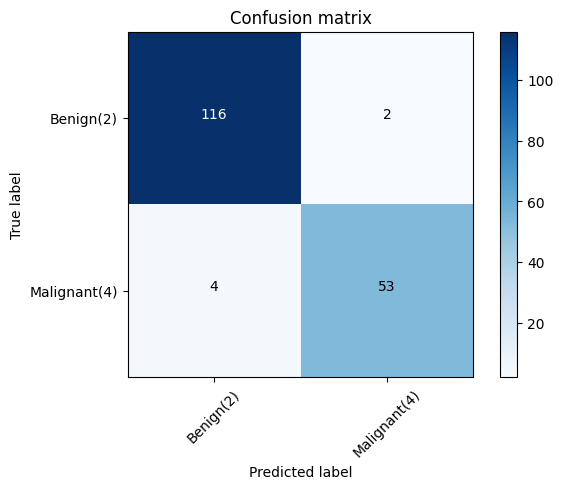

In [103]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

## CROSS VALIDATION AND PIPELINE

In [104]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict

In [105]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [106]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  7  8  9 10 11 13 14] 466
Test index: [ 0  1  4  6 12 15 16 17 23 25] 233

Train index: [ 0  1  4  5  6  8 10 11 12 13] 466
Test index: [ 2  3  7  9 19 21 24 27 30 35] 233

Train index: [ 0  1  2  3  4  6  7  9 12 15] 466
Test index: [ 5  8 10 11 13 14 18 20 22 28] 233



In [107]:
s = StandardScaler()
lr = LogisticRegressionCV()
poly=PolynomialFeatures(degree=3)

In [108]:
from sklearn.pipeline import Pipeline

estimator = Pipeline([("scaler", s),
                      ('higher_degree',poly),
                      ("logistic", lr)])

In [109]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [110]:
r2_score(y, predictions)

0.8226820562068529